#### **Universidade Federal da Bahia.**
#### **Departamento de Eng. Elétrica e Computação**
#### **Avaliação 1 - Introdução ao Aprendizado de Máquina**
#### Semestre: 2023.2
#### Alunos : Ricardo Machado e Rodrigo Pimentel


#### Resumo: A análise e pré-processamento do banco de dados é essencial para uma boa implementação de modelos preditivos. Sendo assim, este trabalho apresenta uma análise sobre tipo e escala, aspectos gerais do banco disponibilizado, como: Balanceamento e características estatísticas. Bem como, a utilização de técnicas apresentadas em sala, para a análise quanto à sua incompletude, presença de ruído, redundâncias e inconsistências. Por fim, foi feito uma transformação no banco analisado e uma análise dos componentes principais(PCA) para gerar gráficos no espaço de atributos. A linguagem utilizada para o trabalho foi Python e a plataforma, Jupyter Notebook.

### Questão 1: Utilizando o banco de dados “Iris Flower Data Set” faça o que se pede a seguir. Utilize todas as estratégias de visualização de dados (boxplots, gráficos de dispersão etc), todos os parâmetros estatísticos (média, desvio padrão, curtose etc) que você julgar pertinentes para cumprir as tarefas propostas abaixo.

##### Inclusão de bibliotecas e carregamento do banco de dados iris.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [8, 6]
pd.options.mode.chained_assignment = None

In [2]:
#Importando o banco de dados.
iris = load_iris()
dados_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
dados_iris['target'] = iris.target

In [3]:
#Conversão numérico-simbólico no atributo alvo com o fim didático de exibir as espécies de plantas nominalmente. Essa transformação será revertida posteriormente.
dados_iris['target'].replace([0, 1, 2], list(iris.target_names), inplace=True)

### Questão 1 a) Caracterize os dados quanto ao Tipo e Escala.

In [4]:
dados_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
dados_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


##### Os atributos de entrada (Comprimento da sepala, Comprimento da petala, Largura da sepala, Largura da petala) são classificados em tipo como quantitativo e em escala como racional.
##### O atributo alvo (Target) indica apenas a espécie da planta, portanto é classificado em tipo como qualitativo e em escala como nominal.

### Questão 1 b) O conjunto de dados é univariado ou multivariado?

In [6]:
dados_iris.columns.difference(['target'])

Index(['petal length (cm)', 'petal width (cm)', 'sepal length (cm)',
       'sepal width (cm)'],
      dtype='object')

Como temos tamanho da pétala, tamanho da sépala, comprimento da pétala e comprimento da sépala variando conforme as espécies de flor Iris. Temos um conjunto de dados multivariado, com 4 atributos de entrada.

### Questão 1 c) Verifique a necessidade de balanceamento dos dados e caracterize estatisticamente os dados.

In [7]:
#ver balanceamento das classes
print(dados_iris.target.value_counts())

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64


<Axes: xlabel='target', ylabel='count'>

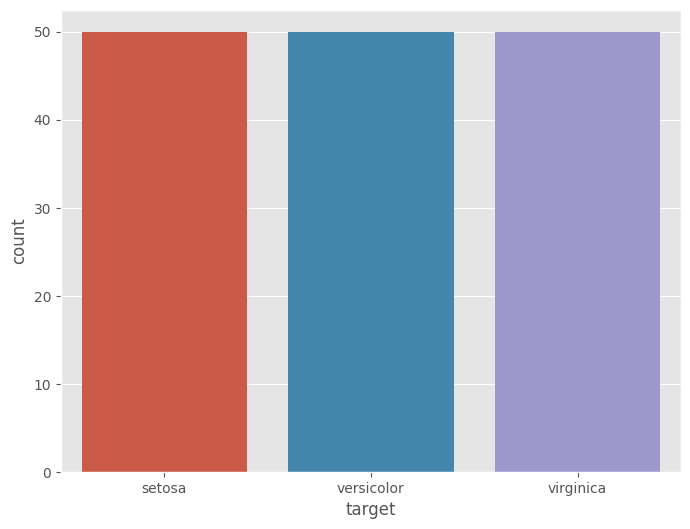

In [8]:
#Plotagem do gráfico
sns.countplot(x=dados_iris['target'])

##### Dado o equilíbrio encontrado na contagem das classes setosa, versicolor e virginica. Foi verificado que o conjunto de dados se trata de um conjunto de dados balanceado.

##### A seguir, utiliza-se o método describe() para calcular a média, desvio padrão, quartis Q1, Q2, Q3 e valor máximo para cada um dos atributos de entrada do banco de dados.

In [9]:
dados_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### Cálculo da obliquidade para os atributos.

In [10]:
dados_iris.skew(numeric_only=True)

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64

##### Plotagem dos histogramas para os atributos preditivos do conjunto de dados.

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

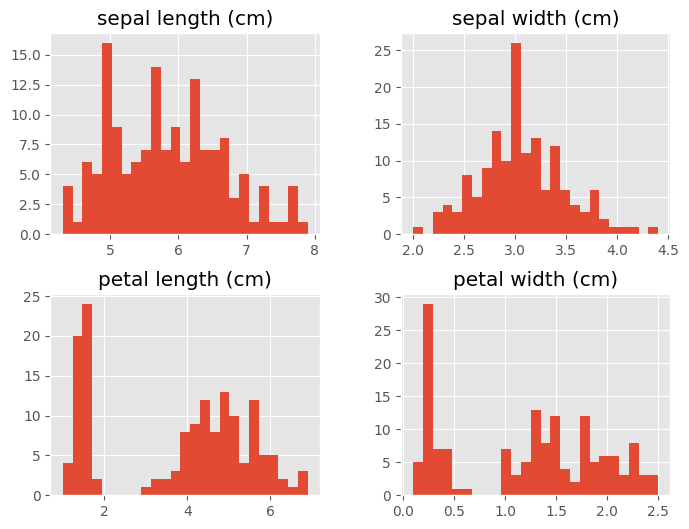

In [11]:
dados_iris.hist(bins=25)

##### As figuras a seguir mostram os boxplots para cada um dos atributos preditivos, com a separação em relação ao target.

<Axes: xlabel='target', ylabel='sepal length (cm)'>

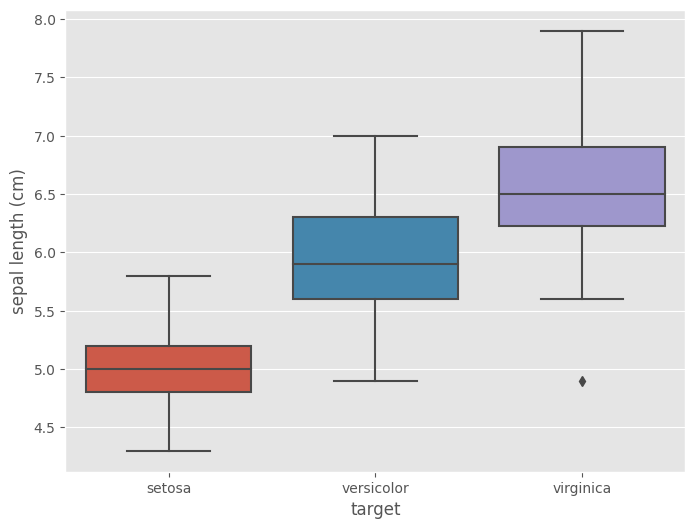

In [12]:
sns.boxplot(data=dados_iris, y=dados_iris['sepal length (cm)'],x=dados_iris['target'])

<Axes: xlabel='target', ylabel='petal length (cm)'>

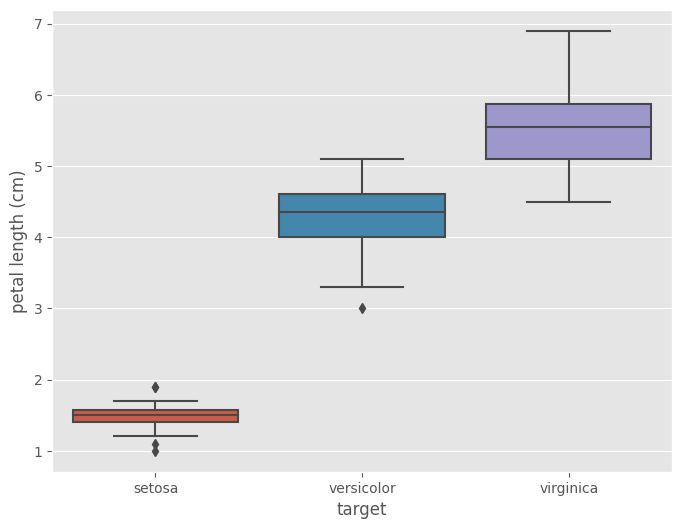

In [13]:
sns.boxplot(data=dados_iris, y=dados_iris['petal length (cm)'],x=dados_iris['target'])

<Axes: xlabel='target', ylabel='petal width (cm)'>

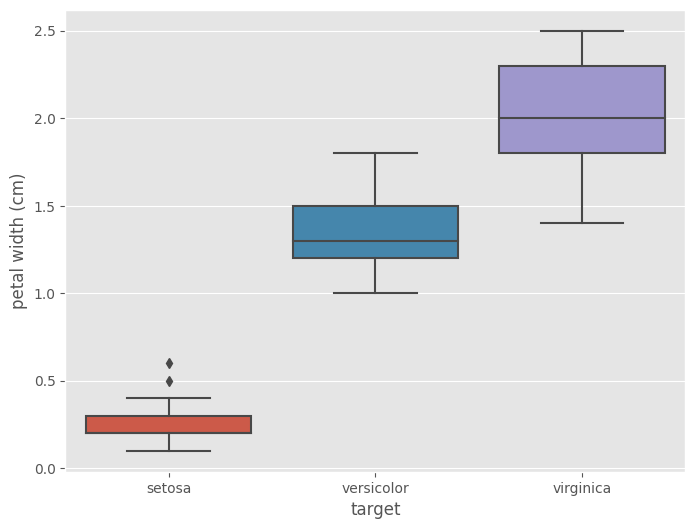

In [14]:
sns.boxplot(data=dados_iris, y=dados_iris['petal width (cm)'],x=dados_iris['target'])

<Axes: xlabel='target', ylabel='sepal width (cm)'>

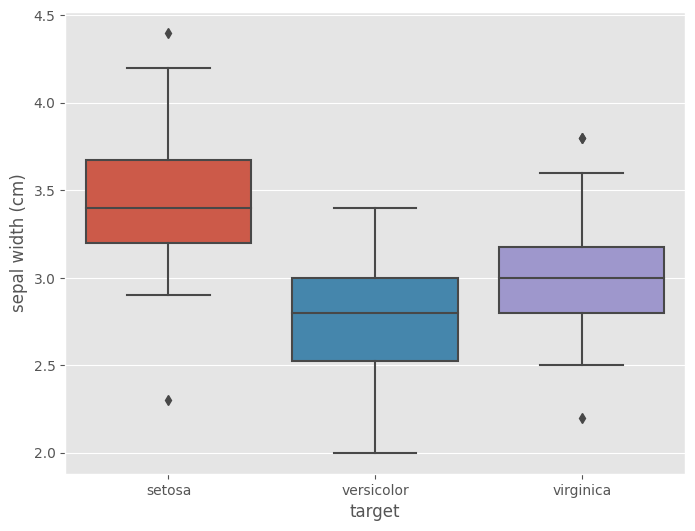

In [15]:
sns.boxplot(data=dados_iris, y=dados_iris['sepal width (cm)'],x=dados_iris['target'])

##### A matriz de correlação é calculada com o objetivo de analisar a correlação entre os atributos do conjunto de dados. O mapa de calor é usado como ferramenta de visualização.

<Axes: >

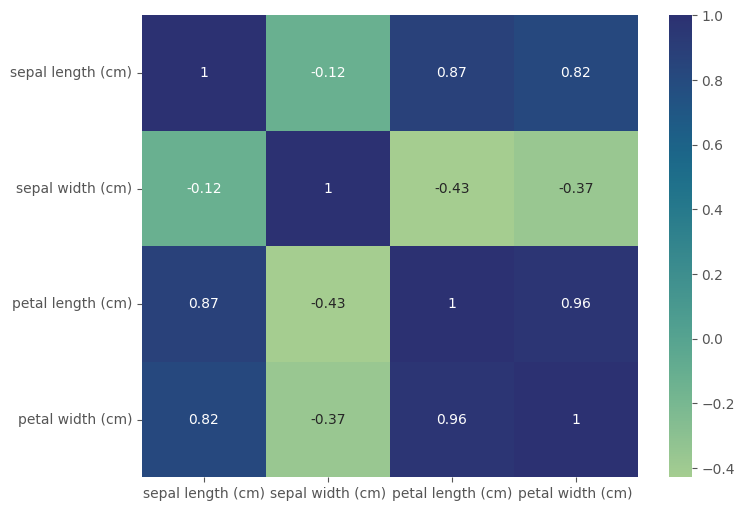

In [16]:
matriz_corr = dados_iris.corr(numeric_only=True)
sns.heatmap(matriz_corr,annot=True,cmap="crest")

### Questão 1 d) Analise os dados quanto à sua incompletude, inconsistências, redundâncias e presença de ruído.

In [17]:
#Buscando por dados faltantes no banco de dados.
dados_iris.isnull().value_counts()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
False              False             False              False             False     150
dtype: int64

##### Conforme visto acima, não há valores ausentes no conjunto de dados.

In [18]:
#verificar dados duplicados.
duplicadas = dados_iris[dados_iris.duplicated()]
#printar dados duplicados
print(duplicadas)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
142                5.8               2.7                5.1               1.9   

        target  
142  virginica  


##### A linha 142 está duplicada, como identificado acima. Portanto, há dados duplicados no banco de dados.

##### Como verificado nos boxpots gerados na questão 1-C, existem outliers tanto para o comprimento e largura da sépala quanto para a pétala. O que pode indicar a presença de ruídos no banco de dados.

### Questão 1 e) - Promova uma transformação de dados consistente com o banco sob análise.

In [19]:
#remover duplicatas
dados_novo = dados_iris.drop_duplicates()
print(dados_novo)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

        target  
0       se

##### O Primeiro tratamento de dados feito foi a remoção dos dados duplicados. Que fora identificado na questão 1-D.

##### Visto que muitos algoritmos de apredizagem de máquinas não operam com valores símbolicos, é preciso alterar novamente o vetor do atributo alvo para valores númericos.

In [20]:
dados_novo['target'].replace(list(iris.target_names), [0, 1, 2], inplace=True)

##### A normalização por padronização é utiliza no banco de dados para evitar que um atributo predomine sobre outro.

$ \text{Valor}_{\text{novo}} = \frac{\text{Valor} - μ} {σ} $


In [21]:
#Cria-se um dataframe sem o atributo preditivo para aplicar a padronização.
X_dados = dados_novo.drop(columns="target")

In [22]:
scaler = StandardScaler()
X_dados_normalizado = scaler.fit_transform(X_dados)

### Questão 1 f) - Utilize a análise de componentes principais (PCA) para gerar gráficos no espaço de atributos.

In [23]:
#Para o trabalho utiliza-se o PCA com 2 componentes.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dados)


Text(0, 0.5, 'Segundo componente principal')

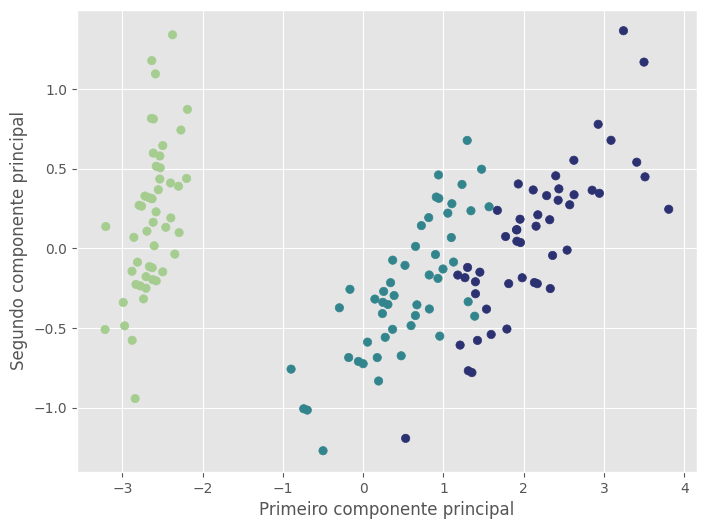

In [24]:
fig1, ax1 = plt.subplots()
ax1.scatter(X_pca[:,0], X_pca[:,1],c=dados_novo['target'],cmap="crest")
ax1.set_xlabel("Primeiro componente principal")
ax1.set_ylabel("Segundo componente principal")

##### Legenda do gráfico:


verde_16.png Iris Setosa

azul_1_16.png Iris Versicolor

azul_escuro_1_16.png Iris Virginica

##### De forma analóga, o mesmo procedimento é realizado para o banco de dados com padronização.

In [25]:
X_pca_normalizado = pca.fit_transform(X_dados_normalizado)

Text(0, 0.5, 'Segundo componente principal')

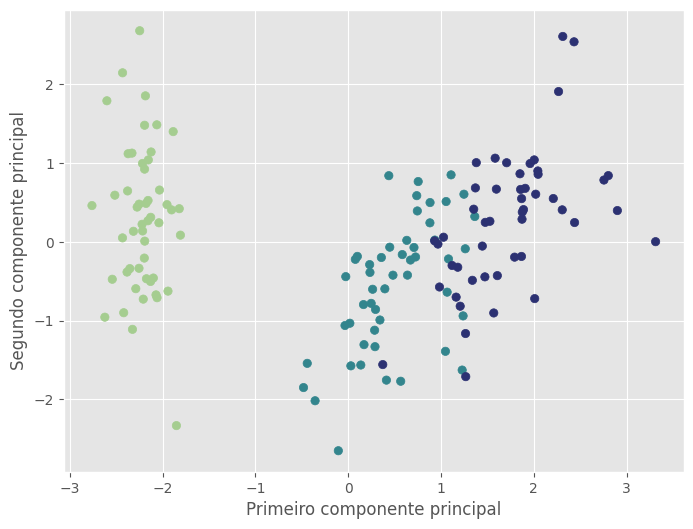

In [26]:
fig2, ax2 = plt.subplots()
ax2.scatter(X_pca_normalizado[:,0], X_pca_normalizado[:,1],c=dados_novo['target'],cmap="crest")
ax2.set_xlabel("Primeiro componente principal")
ax2.set_ylabel("Segundo componente principal")